In [1]:
import mlrose_hiive as ml
import numpy as np

In [2]:
import time
import math

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
all_fitness_data = {}

In [5]:
runs = 5

In [41]:
# problem_sizes = np.linspace(30, 300, 10).astype(int).tolist()
problem_sizes = np.linspace(15, 150, 10).astype(int).tolist()

In [42]:
ks_problems = []

for size in problem_sizes:
    weights = []
    values = []
    for _ in range(int(size)):
        weight = np.random.randint(1, 21)  # Ensure weight is between 1 and 20
        if np.random.rand() > 0.5:
            value = weight + np.random.randint(1, 11)  # Ensure value is non-zero and close to weight
        else:
            if np.random.rand() > 0.5:
                value = max(1, weight // 2)  # Ensure value is non-zero and less than weight
            else:
                value = weight * 2 + np.random.randint(1, 11)  # Ensure value is non-zero and greater than weight
        weights.append(weight)
        values.append(value)
    
    ks_problems.append([weights, values])

In [43]:
all_fitness_data['ks'] = {}

In [44]:
all_fitness_data['ks']['rhc'] = {}

for p, size in zip(ks_problems, problem_sizes):

    fitness = ml.Knapsack(p[0], p[1], max_weight_pct=0.6)
    
    instances_fitness_data = []
    
    for i in range(runs):
        problem = ml.DiscreteOpt(length=size, fitness_fn=fitness, maximize=True)
        instance_fitness_data = {}

        st = time.time()
        best_state, best_fitness, fit_curve = ml.random_hill_climb(problem, max_attempts=100, max_iters=np.inf, curve=True)
        et = time.time()
        
        instance_fitness_data['best_state'] = best_state
        instance_fitness_data['best_fitness'] = best_fitness
        instance_fitness_data['fit_curve'] = fit_curve
        instance_fitness_data['time'] = et - st

        instances_fitness_data.append(instance_fitness_data)

        # problem.reset_function_calls()

    all_fitness_data['ks']['rhc'][size] = sorted(instances_fitness_data, key=lambda d: d['best_fitness'])[-1]

In [45]:
all_fitness_data['ks']['sa'] = {}

schedule = ml.ExpDecay()

for p, size in zip(ks_problems, problem_sizes):
    print(f'{size}:', end=' ')
    
    fitness = ml.Knapsack(p[0], p[1], max_weight_pct=0.6)
    
    instances_fitness_data = []
    
    for i in range(runs):
        print(f'{i+1}', end=' ')
        
        problem = ml.DiscreteOpt(length=size, fitness_fn=fitness, maximize=True)
        instance_fitness_data = {}

        st = time.time()
        best_state, best_fitness, fit_curve = ml.simulated_annealing(problem, schedule=schedule, max_attempts=100, max_iters=np.inf, curve=True)
        et = time.time()
        
        instance_fitness_data['best_state'] = best_state
        instance_fitness_data['best_fitness'] = best_fitness
        instance_fitness_data['fit_curve'] = fit_curve
        instance_fitness_data['time'] = et - st

        instances_fitness_data.append(instance_fitness_data)

        # problem.reset_function_calls()

    all_fitness_data['ks']['sa'][size] = sorted(instances_fitness_data, key=lambda d: d['best_fitness'])[-1]
    print()

15: 1 2 3 4 5 
30: 1 2 3 4 5 
45: 1 2 3 4 5 
60: 1 2 3 4 5 
75: 1 2 3 4 5 
90: 1 2 3 4 5 
105: 1 2 3 4 5 
120: 1 2 3 4 5 
135: 1 2 3 4 5 
150: 1 2 3 4 5 


In [46]:
all_fitness_data['ks']['ga'] = {}

for p, size in zip(ks_problems, problem_sizes):
    print(f'{size}:', end=' ')
    
    fitness = ml.Knapsack(p[0], p[1], max_weight_pct=0.6)
    
    instances_fitness_data = []
    
    for i in range(runs):
        print(f'{i+1}', end=' ')
        
        problem = ml.DiscreteOpt(length=size, fitness_fn=fitness, maximize=True)
        instance_fitness_data = {}

        st = time.time()
        best_state, best_fitness, fit_curve = ml.genetic_alg(problem, pop_size=200, mutation_prob=0.1, max_attempts=100, max_iters=np.inf, curve=True)
        et = time.time()
        
        instance_fitness_data['best_state'] = best_state
        instance_fitness_data['best_fitness'] = best_fitness
        instance_fitness_data['fit_curve'] = fit_curve
        instance_fitness_data['time'] = et - st

        instances_fitness_data.append(instance_fitness_data)

    all_fitness_data['ks']['ga'][size] = sorted(instances_fitness_data, key=lambda d: d['best_fitness'])[-1]
    print()

15: 1 2 3 4 5 
30: 1 2 3 4 5 
45: 1 2 3 4 5 
60: 1 2 3 4 5 
75: 1 2 3 4 5 
90: 1 2 3 4 5 
105: 1 2 3 4 5 
120: 1 2 3 4 5 
135: 1 2 3 4 5 
150: 1 2 3 4 5 


In [48]:
all_fitness_data['ks']['mmc'] = {}

for p, size in zip(ks_problems, problem_sizes):
    print(f'{size}:', end=' ')
    
    fitness = ml.Knapsack(p[0], p[1], max_weight_pct=0.6)
    
    instances_fitness_data = []

    # for i in range(runs):
    for i in range(1):
        print(f'{i+1}', end=' ')
        
        problem = ml.DiscreteOpt(length=size, fitness_fn=fitness, maximize=True)
        instance_fitness_data = {}

        st = time.time()
        best_state, best_fitness, fit_curve = ml.mimic(problem, pop_size=200, keep_pct=0.2, max_attempts=100, max_iters=np.inf, curve=True)
        et = time.time()
        
        instance_fitness_data['best_state'] = best_state
        instance_fitness_data['best_fitness'] = best_fitness
        instance_fitness_data['fit_curve'] = fit_curve
        instance_fitness_data['time'] = et - st

        instances_fitness_data.append(instance_fitness_data)

    # all_fitness_data['ks']['mmc'][size] = sorted(instances_fitness_data, key=lambda d: d['best_fitness'])[-1]
    all_fitness_data['ks']['mmc'][size] = instances_fitness_data[-1]
    print()

15: 1 
30: 1 
45: 1 
60: 1 
75: 1 
90: 1 
105: 1 
120: 1 
135: 1 
150: 1 


In [49]:
def transform_data(data, problem_name):
    rows = []
    for algorithm, sizes in data[problem_name].items():
        for size, metrics in sizes.items():
            rows.append({'Algorithm': algorithm, 'Size': size, 'Fit': metrics['best_fitness'], 'Time': metrics['time'], 'Curve': metrics['fit_curve']})
            
    return pd.DataFrame(rows)

In [50]:
ks_fit_df = transform_data(all_fitness_data, 'ks')

In [51]:
ks_fit_df

,Algorithm,Size,Fit,Time,Curve
0,rhc,15,141.0,0.002000,"[[136.0, 1.0], [141.0, 3.0], [141.0, 4.0], [14..."
1,rhc,30,296.0,0.003968,"[[177.0, 1.0], [192.0, 3.0], [195.0, 5.0], [19..."
2,rhc,45,450.0,0.004527,"[[350.0, 2.0], [354.0, 4.0], [354.0, 5.0], [35..."
3,rhc,60,565.0,0.003000,"[[543.0, 1.0], [543.0, 2.0], [543.0, 3.0], [54..."
4,rhc,75,654.0,0.004000,"[[457.0, 1.0], [457.0, 2.0], [457.0, 3.0], [45..."
5,rhc,90,937.0,0.004000,"[[691.0, 2.0], [704.0, 4.0], [714.0, 6.0], [74..."
6,rhc,105,1019.0,0.003001,"[[960.0, 2.0], [960.0, 3.0], [976.0, 5.0], [97..."
7,rhc,120,1266.0,0.005000,"[[991.0, 1.0], [991.0, 2.0], [996.0, 4.0], [99..."
8,rhc,135,1251.0,0.007033,"[[1109.0, 2.0], [1117.0, 4.0], [1135.0, 6.0], ..."
9,rhc,150,1417.0,0.003010,"[[1250.0, 1.0], [1250.0, 2.0], [1253.0, 4.0], ..."


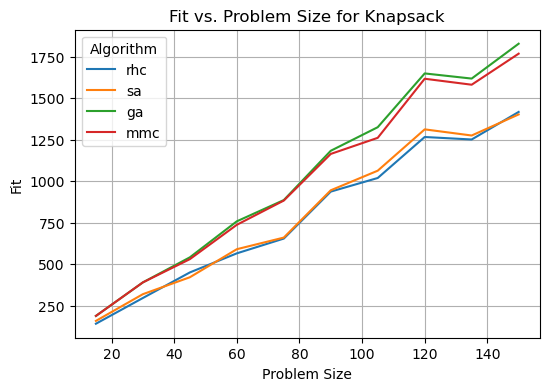

In [52]:
plt.figure(figsize=(6, 4))
sns.lineplot(x='Size', y='Fit', hue='Algorithm', data=ks_fit_df)
plt.title(f'Fit vs. Problem Size for Knapsack')
plt.xlabel('Problem Size')
plt.ylabel('Fit')
# plt.xscale('linear')
plt.grid(True)
plt.show()

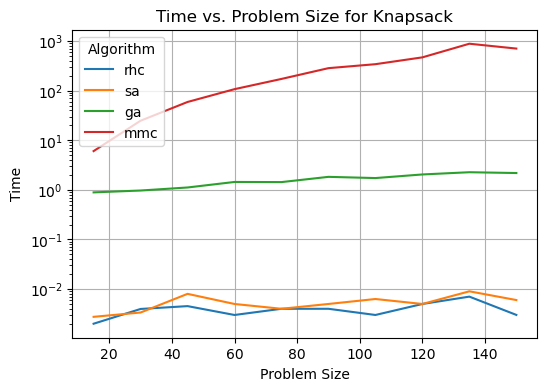

In [53]:
plt.figure(figsize=(6, 4))
sns.lineplot(x='Size', y='Time', hue='Algorithm', data=ks_fit_df)
plt.title(f'Time vs. Problem Size for Knapsack')
plt.xlabel('Problem Size')
plt.ylabel('Time')
# plt.xscale('linear')
plt.yscale('log')
plt.grid(True)
plt.show()

In [54]:
algs = ['rhc', 'sa', 'ga', 'mmc']

In [55]:
ks_curve_data = {}

for alg in algs:
    ks_curve_data[alg] = pd.DataFrame(list(map(lambda x: (int(x[1]), x[0]), ks_fit_df.query(f"(Algorithm == '{alg}') & (Size == {problem_sizes[-2]})").iloc[0].Curve.tolist())), columns=['FEvals', 'Fit'])
    ks_curve_data[alg]['Time'] = np.linspace(0, ks_fit_df.query(f"(Algorithm == '{alg}') & (Size == {problem_sizes[-2]})").iloc[0].Time, ks_curve_data[alg].shape[0])

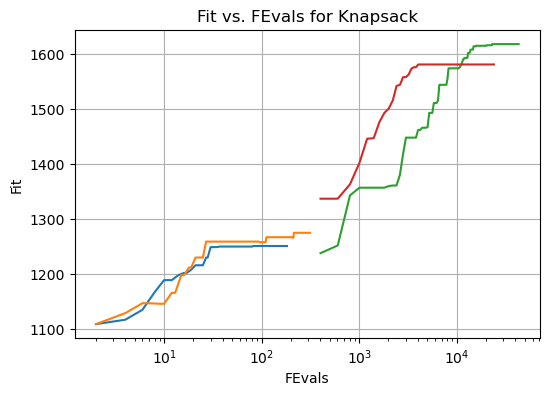

In [56]:
plt.figure(figsize=(6, 4))

for alg in algs:
    sns.lineplot(x=ks_curve_data[alg]['FEvals'], y=ks_curve_data[alg]['Fit'])

plt.title(f'Fit vs. FEvals for Knapsack')
plt.xlabel('FEvals')
plt.ylabel('Fit')
plt.xscale('log')
plt.grid(True)
plt.show()

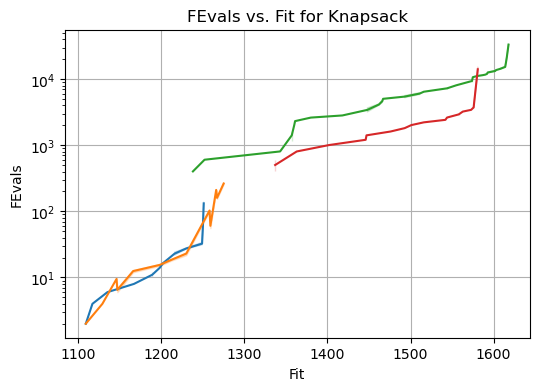

In [57]:
plt.figure(figsize=(6, 4))

for alg in algs:
    sns.lineplot(x=ks_curve_data[alg]['Fit'], y=ks_curve_data[alg]['FEvals'])

plt.title(f'FEvals vs. Fit for Knapsack')
plt.xlabel('Fit')
plt.ylabel('FEvals')
plt.yscale('log')
plt.grid(True)
plt.show()

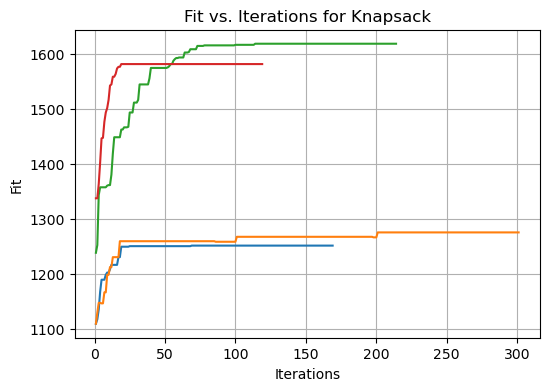

In [82]:
plt.figure(figsize=(6, 4))

for alg in algs:
    sns.lineplot(x=ks_curve_data[alg].index.to_numpy()+1, y=ks_curve_data[alg]['Fit'])

plt.title(f'Fit vs. Iterations for Knapsack')
plt.xlabel('Iterations')
plt.ylabel('Fit')
# plt.xscale('log')
plt.grid(True)
plt.show()

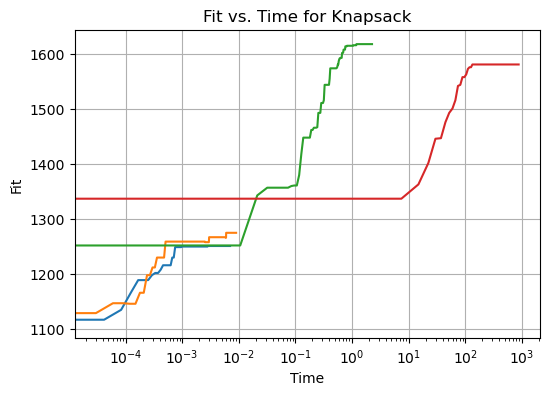

In [127]:
plt.figure(figsize=(6, 4))

for alg in algs:
    sns.lineplot(x=ks_curve_data[alg]['Time'], y=ks_curve_data[alg]['Fit'])

plt.title(f'Fit vs. Time for Knapsack')
plt.xlabel('Time')
plt.ylabel('Fit')
plt.xscale('log')
plt.grid(True)
plt.show()

In [61]:
import pickle

In [62]:
with open('ks_pickle.pkl', 'wb') as file:
    pickle.dump(all_fitness_data, file)

In [114]:
ks_fit_df['Total FEvals'] = ks_fit_df.Curve.apply(lambda c: c.sum(axis=0)[1])

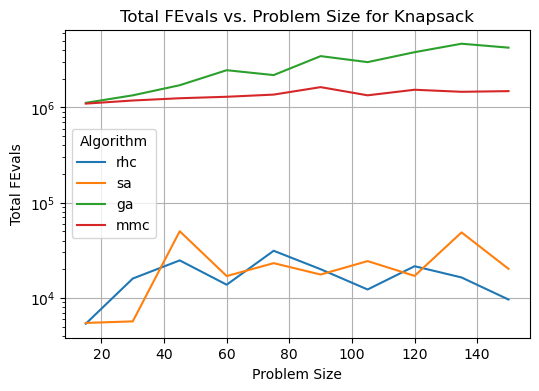

In [115]:
plt.figure(figsize=(6, 4))
sns.lineplot(x='Size', y='Total FEvals', hue='Algorithm', data=ks_fit_df)
plt.title(f'Total FEvals vs. Problem Size for Knapsack')
plt.xlabel('Problem Size')
plt.ylabel('Total FEvals')
# plt.xscale('linear')
plt.yscale('log')
plt.grid(True)
plt.show()

In [116]:
ks_fit_df['Total Iterations'] = ks_fit_df.Curve.apply(lambda c: c.shape[0])

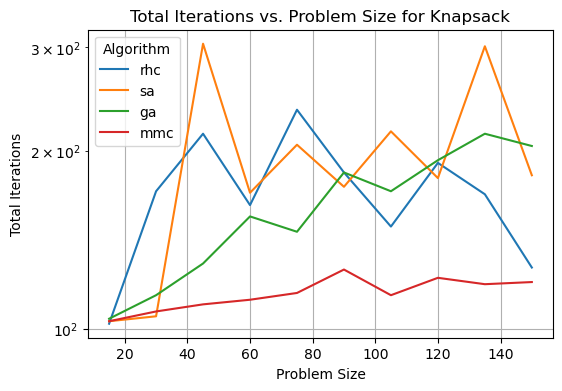

In [121]:
plt.figure(figsize=(6, 4))
sns.lineplot(x='Size', y='Total Iterations', hue='Algorithm', data=ks_fit_df)
plt.title(f'Total Iterations vs. Problem Size for Knapsack')
plt.xlabel('Problem Size')
plt.ylabel('Total Iterations')
# plt.xscale('linear')
plt.yscale('log')
plt.grid(True)
plt.show()

In [63]:
ga_fitness_data = {}
ga_fitness_data['ks'] = {}

In [64]:
ga_fitness_data['ks']['def'] = {}

for p, size in zip(ks_problems, problem_sizes):
    print(f'{size}:', end=' ')
    
    fitness = ml.Knapsack(p[0], p[1], max_weight_pct=0.6)
    
    instances_fitness_data = []
    
    for i in range(runs):
        print(f'{i+1}', end=' ')
        
        problem = ml.DiscreteOpt(length=size, fitness_fn=fitness, maximize=True)
        instance_fitness_data = {}

        st = time.time()
        best_state, best_fitness, fit_curve = ml.genetic_alg(problem, pop_size=200, mutation_prob=0.1, max_attempts=100, max_iters=np.inf, curve=True)
        et = time.time()
        
        instance_fitness_data['best_state'] = best_state
        instance_fitness_data['best_fitness'] = best_fitness
        instance_fitness_data['fit_curve'] = fit_curve
        instance_fitness_data['time'] = et - st

        instances_fitness_data.append(instance_fitness_data)

    ga_fitness_data['ks']['def'][size] = sorted(instances_fitness_data, key=lambda d: d['best_fitness'])[-1]
    print()

15: 1 2 3 4 5 
30: 1 2 3 4 5 
45: 1 2 3 4 5 
60: 1 2 3 4 5 
75: 1 2 3 4 5 
90: 1 2 3 4 5 
105: 1 2 3 4 5 
120: 1 2 3 4 5 
135: 1 2 3 4 5 
150: 1 2 3 4 5 


In [65]:
ga_fitness_data['ks']['c1'] = {}

for p, size in zip(ks_problems, problem_sizes):
    print(f'{size}:', end=' ')
    
    fitness = ml.Knapsack(p[0], p[1], max_weight_pct=0.6)
    
    instances_fitness_data = []
    
    for i in range(runs):
        print(f'{i+1}', end=' ')
        
        problem = ml.DiscreteOpt(length=size, fitness_fn=fitness, maximize=True)
        instance_fitness_data = {}

        st = time.time()
        best_state, best_fitness, fit_curve = ml.genetic_alg(problem, pop_size=400, mutation_prob=0.1, max_attempts=100, max_iters=np.inf, curve=True)
        et = time.time()
        
        instance_fitness_data['best_state'] = best_state
        instance_fitness_data['best_fitness'] = best_fitness
        instance_fitness_data['fit_curve'] = fit_curve
        instance_fitness_data['time'] = et - st

        instances_fitness_data.append(instance_fitness_data)

    ga_fitness_data['ks']['c1'][size] = sorted(instances_fitness_data, key=lambda d: d['best_fitness'])[-1]
    print()

15: 1 2 3 4 5 
30: 1 2 3 4 5 
45: 1 2 3 4 5 
60: 1 2 3 4 5 
75: 1 2 3 4 5 
90: 1 2 3 4 5 
105: 1 2 3 4 5 
120: 1 2 3 4 5 
135: 1 2 3 4 5 
150: 1 2 3 4 5 


In [66]:
ga_fitness_data['ks']['c2'] = {}

for p, size in zip(ks_problems, problem_sizes):
    print(f'{size}:', end=' ')
    
    fitness = ml.Knapsack(p[0], p[1], max_weight_pct=0.6)
    
    instances_fitness_data = []
    
    for i in range(runs):
        print(f'{i+1}', end=' ')
        
        problem = ml.DiscreteOpt(length=size, fitness_fn=fitness, maximize=True)
        instance_fitness_data = {}

        st = time.time()
        best_state, best_fitness, fit_curve = ml.genetic_alg(problem, pop_size=200, mutation_prob=0.25, max_attempts=100, max_iters=np.inf, curve=True)
        et = time.time()
        
        instance_fitness_data['best_state'] = best_state
        instance_fitness_data['best_fitness'] = best_fitness
        instance_fitness_data['fit_curve'] = fit_curve
        instance_fitness_data['time'] = et - st

        instances_fitness_data.append(instance_fitness_data)

    ga_fitness_data['ks']['c2'][size] = sorted(instances_fitness_data, key=lambda d: d['best_fitness'])[-1]
    print()

15: 1 2 3 4 5 
30: 1 2 3 4 5 
45: 1 2 3 4 5 
60: 1 2 3 4 5 
75: 1 2 3 4 5 
90: 1 2 3 4 5 
105: 1 2 3 4 5 
120: 1 2 3 4 5 
135: 1 2 3 4 5 
150: 1 2 3 4 5 


In [67]:
ga_fitness_data['ks']['c3'] = {}

for p, size in zip(ks_problems, problem_sizes):
    print(f'{size}:', end=' ')
    
    fitness = ml.Knapsack(p[0], p[1], max_weight_pct=0.6)
    
    instances_fitness_data = []
    
    for i in range(runs):
        print(f'{i+1}', end=' ')
        
        problem = ml.DiscreteOpt(length=size, fitness_fn=fitness, maximize=True)
        instance_fitness_data = {}

        st = time.time()
        best_state, best_fitness, fit_curve = ml.genetic_alg(problem, pop_size=400, mutation_prob=0.25, max_attempts=100, max_iters=np.inf, curve=True)
        et = time.time()
        
        instance_fitness_data['best_state'] = best_state
        instance_fitness_data['best_fitness'] = best_fitness
        instance_fitness_data['fit_curve'] = fit_curve
        instance_fitness_data['time'] = et - st

        instances_fitness_data.append(instance_fitness_data)

    ga_fitness_data['ks']['c3'][size] = sorted(instances_fitness_data, key=lambda d: d['best_fitness'])[-1]
    print()

15: 1 2 3 4 5 
30: 1 2 3 4 5 
45: 1 2 3 4 5 
60: 1 2 3 4 5 
75: 1 2 3 4 5 
90: 1 2 3 4 5 
105: 1 2 3 4 5 
120: 1 2 3 4 5 
135: 1 2 3 4 5 
150: 1 2 3 4 5 


In [123]:
ga_fit_df = transform_data(ga_fitness_data, 'ks')

In [124]:
ga_fit_df.Algorithm.replace({'def': 'default', 'c1': 'setting 1', 'c2': 'setting 2', 'c3': 'setting 3'}, inplace=True)

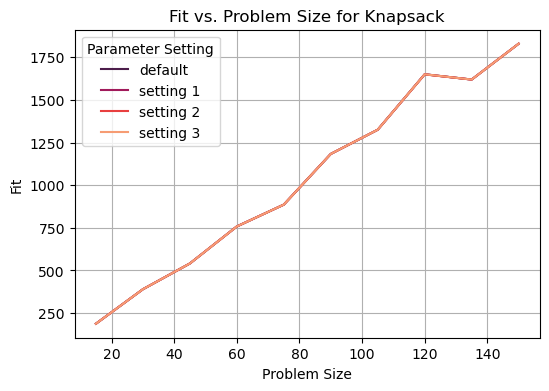

In [125]:
plt.figure(figsize=(6, 4))
sns.lineplot(x='Size', y='Fit', hue='Parameter Setting', data=ga_fit_df.rename(columns={'Algorithm': 'Parameter Setting'}), palette='rocket')
plt.title(f'Fit vs. Problem Size for Knapsack')
plt.xlabel('Problem Size')
plt.ylabel('Fit')
# plt.xscale('linear')
plt.grid(True)
plt.show()

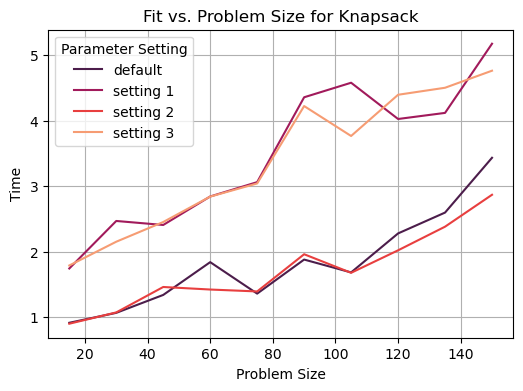

In [126]:
plt.figure(figsize=(6, 4))
sns.lineplot(x='Size', y='Time', hue='Parameter Setting', data=ga_fit_df.rename(columns={'Algorithm': 'Parameter Setting'}), palette='rocket')
plt.title(f'Fit vs. Problem Size for Knapsack')
plt.xlabel('Problem Size')
plt.ylabel('Time')
# plt.xscale('linear')
plt.grid(True)
plt.show()

In [97]:
ga_fit_df = transform_data(ga_fitness_data, 'ks')

In [98]:
params = list(ga_fitness_data['ks'].keys())
params

['def', 'c1', 'c2', 'c3']

In [99]:
for size in problem_sizes:
    print(
        (ga_fitness_data['ks']['def'][size]['best_state'] == ga_fitness_data['ks']['c1'][size]['best_state']).all() \
        and (ga_fitness_data['ks']['c1'][size]['best_state'] == ga_fitness_data['ks']['c2'][size]['best_state']).all() \
        and (ga_fitness_data['ks']['c2'][size]['best_state'] == ga_fitness_data['ks']['c3'][size]['best_state']).all() \
    )

False
True
False
True
False
False
False
False
False
False
